In [26]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mtick
import numpy as np
from skmisc.loess import loess
from matplotlib.lines import Line2D
from matplotlib import patches
mpl.rc('font', family='Helvetica')
colors =  ['#41558c', '#E89818', '#CF202A']

if os.path.exists(os.path.join(os.getcwd(), '..', 'output')) is False:
    os.mkdir(os.path.join(os.getcwd(), '..', 'output'))
if os.path.exists(os.path.join(os.getcwd(), '..', 'output', 'figures')) is False:
    os.mkdir(os.path.join(os.getcwd(), '..', 'output', 'figures'))
raw_path = os.path.join(os.getcwd(), '..', 'outputs')

def load_data(filename1, filename2):
    df_synths = pd.read_csv(os.path.join(raw_path,
                                         filename1),
                            index_col='year')
    df_synths = df_synths[-8:6]
    df_treats = pd.read_csv(os.path.join(raw_path,
                                         filename2),
                            index_col='year')
    df_treats = df_treats[-8:6]
    return [df_synths, df_treats]


def figure_plotter(hi, mhi, mli, li, varname, figname):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,
                                                 figsize=(10, 7),
                                                 )
    for ax in [ax1, ax2, ax3, ax4]: 
        ax.axvline(x=0, linestyle='--', color='k', alpha=.5, linewidth=1)
    for ax, df in zip([ax1, ax2, ax3, ax4], [hi, mhi, mli, li]):
        ax.plot(df[0].mean(axis=1), color=colors[0])
        ax.plot(df[1].mean(axis=1), color=colors[1])
        ax.fill_between(df[0].index,
                        y1=df[0].mean(axis=1),
                        y2=df[1].mean(axis=1),
                        color=colors[2], alpha=0.15)
    min_y = 0
    max_y = 0
    counter = 0
    for ax in [ax1, ax2, ax3, ax4]: 
        if (ax.get_ylim()[0]<min_y) or (counter==0):
            min_y = ax.get_ylim()[0]
        if (ax.get_ylim()[1]>max_y) or (counter==0):
            max_y = ax.get_ylim()[1]
        counter += 1
    for ax, letter in zip([ax1, ax2, ax3, ax4], ['a.', 'b.', 'c.', 'd.']):
        ax.set_ylim(min_y-(min_y/25), max_y+(max_y/25))
        ax.set_title(letter, loc='left', fontsize=16)
        if figname != 'prob_emp':
            ax.yaxis.set_major_formatter('£{x:1.0f}')
        ax.grid(linestyle='--', color='k', alpha=0.1, zorder=0)
        ax.yaxis.set_major_locator(plt.MaxNLocator(6))
    ax1.set_ylabel(' Average Treatment Effect \n' + varname)
    ax3.set_ylabel(' Average Treatment Effect \n' + varname)
    ax1.set_xlabel('Treatment Time ($t$)\n  (High Intensity)  ', fontsize=9)
    ax2.set_xlabel(' Treatment Time ($t$) \n(Medium High Intensity)', fontsize=9)
    ax3.set_xlabel('Treatment Time ($t$)\n(Medium Low Intensity)', fontsize=9)
    ax4.set_xlabel('Treatment Time ($t$)\n  (Low Intensity)  ', fontsize=9)                   
    legend_elements = [Line2D([0], [0],
                              linewidth=1,
                              color=colors[0], label=r'Synthetic Control'),
                       Line2D([0], [0],
                              linewidth=1,
                              color=colors[1], label=r'Treatment'),
                       patches.Patch(facecolor=mpl.colors.to_rgba(colors[2], 0.1),
                                     edgecolor=mpl.colors.to_rgba('k', 1),
                                     lw=0.75,
                                     alpha=0.5,
                                     label='Difference'),
                      ]
    if figname == 'prob_emp':
        ax1.legend(handles=legend_elements, loc='lower left', frameon=True,
                   fontsize=9.5, framealpha=1, facecolor='w',
                   edgecolor='k', handletextpad=0.25
                  )
    else:
        ax1.legend(handles=legend_elements, loc='upper left', frameon=True,
                   fontsize=9.5, framealpha=1, facecolor='w',
                   edgecolor='k', handletextpad=0.25
                  )

    plt.tight_layout()
    sns.despine()    
    plt.savefig(os.path.join(os.getcwd(), '..',
                             'output',
                             'figures',
                             figname+'.pdf'))

In [36]:
treats = pd.read_csv('../outputs/w_diffs_hh_inc_deflated_li.csv', index_col='year')
treats = treats.mean(axis=1)
treats[0:6].mean()

/tmp/ipykernel_25735/114540809.py:3: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  treats[0:6].mean()


-32.16949587763867

/tmp/ipykernel_25735/3790321419.py:24: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  df_synths = df_synths[-8:6]
/tmp/ipykernel_25735/3790321419.py:28: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  df_treats = df_treats[-8:6]
/tmp/ipykernel_25735/3790321419.py:24: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  df_synths = df_synths[-8:6]
/tmp/ipykernel_25735/3790321419.py:28: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as

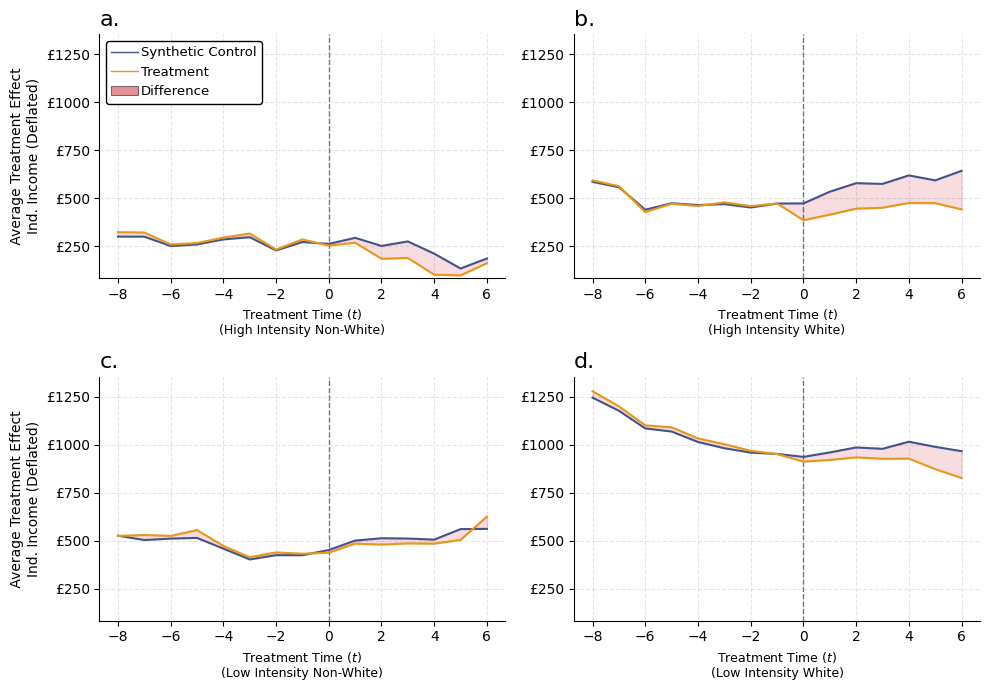

In [10]:
df_hi = load_data('w_synths_ind_inc_deflated_high_nw.csv',
                  'w_treats_ind_inc_deflated_high_nw.csv')
df_mhi = load_data('w_synths_ind_inc_deflated_high_w.csv',
                   'w_treats_ind_inc_deflated_high_w.csv')
df_mli = load_data('w_synths_ind_inc_deflated_low_nw.csv',
                   'w_treats_ind_inc_deflated_low_nw.csv')
df_li = load_data('w_synths_ind_inc_deflated_low_w.csv',
                  'w_treats_ind_inc_deflated_low_w.csv')   
figure_plotter(df_hi, df_mhi, df_mli, df_li,
               'Ind. Income (Deflated)',
               'ind_inc_deflated')

/tmp/ipykernel_25735/799265059.py:24: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  df_synths = df_synths[-8:6]
/tmp/ipykernel_25735/799265059.py:28: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  df_treats = df_treats[-8:6]
/tmp/ipykernel_25735/799265059.py:24: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  df_synths = df_synths[-8:6]
/tmp/ipykernel_25735/799265059.py:28: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as pos

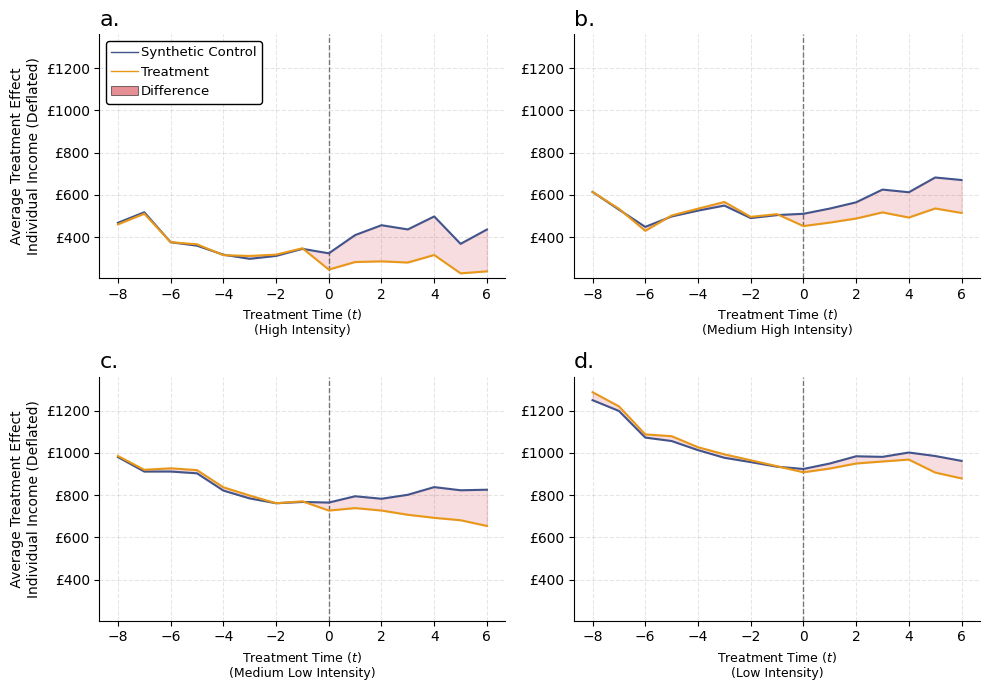

In [27]:
df_hi = load_data('w_synths_ind_inc_deflated_hi.csv',
                  'w_treats_ind_inc_deflated_hi.csv')
df_mhi = load_data('w_synths_ind_inc_deflated_mhi.csv',
                   'w_treats_ind_inc_deflated_mhi.csv')
df_mli = load_data('w_synths_ind_inc_deflated_mli.csv',
                   'w_treats_ind_inc_deflated_mli.csv')
df_li = load_data('w_synths_ind_inc_deflated_li.csv',
                  'w_treats_ind_inc_deflated_li.csv')   
figure_plotter(df_hi, df_mhi, df_mli, df_li,
               'Individual Income (Deflated)',
               'ind_inc_deflated')

/tmp/ipykernel_25735/799265059.py:24: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  df_synths = df_synths[-8:6]
/tmp/ipykernel_25735/799265059.py:28: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  df_treats = df_treats[-8:6]
/tmp/ipykernel_25735/799265059.py:24: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  df_synths = df_synths[-8:6]
/tmp/ipykernel_25735/799265059.py:28: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as pos

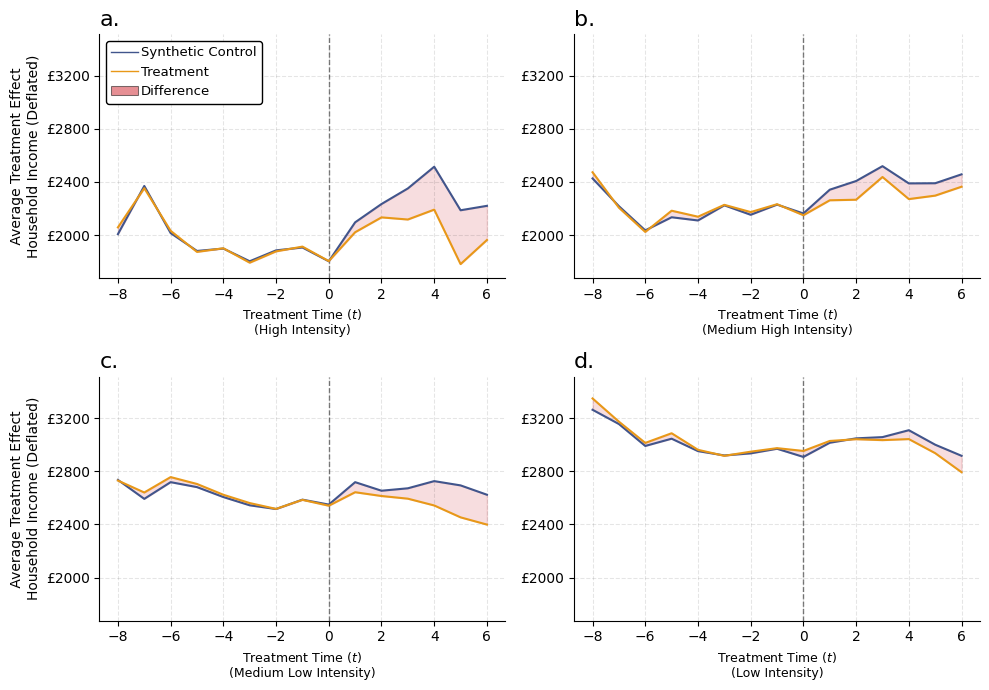

In [28]:
df_hi = load_data('w_synths_hh_inc_deflated_hi.csv',
                  'w_treats_hh_inc_deflated_hi.csv')
df_mhi = load_data('w_synths_hh_inc_deflated_mhi.csv',
                   'w_treats_hh_inc_deflated_mhi.csv')
df_mli = load_data('w_synths_hh_inc_deflated_mli.csv',
                   'w_treats_hh_inc_deflated_mli.csv')
df_li = load_data('w_synths_hh_inc_deflated_li.csv',
                  'w_treats_hh_inc_deflated_li.csv')   
figure_plotter(df_hi, df_mhi, df_mli, df_li,
               'Household Income (Deflated)',
               'hh_inc_deflated')

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

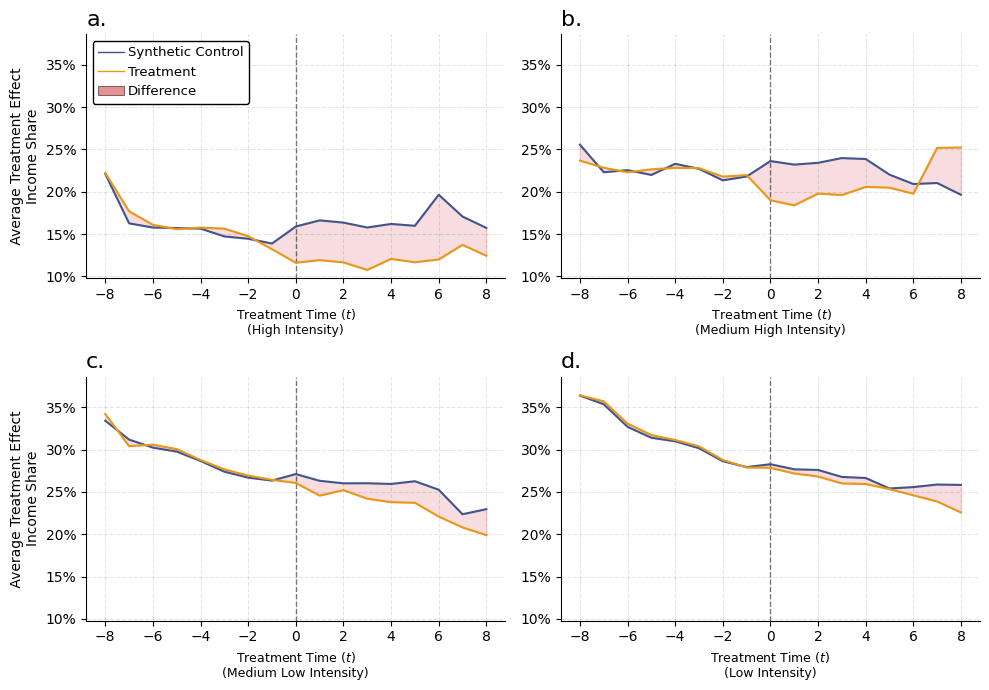

In [17]:
df_hi = load_data('synths_inc_share_hi.csv',
                  'treats_inc_share_hi.csv')
df_mhi = load_data('synths_inc_share_mhi.csv',
                   'treats_inc_share_mhi.csv')
df_mli = load_data('synths_inc_share_mli.csv',
                   'treats_inc_share_mli.csv')
df_li = load_data('synths_inc_share_li.csv',
                  'treats_inc_share_li.csv')   
figure_plotter(df_hi, df_mhi, df_mli, df_li,
               'Income Share',
               'inc_share')

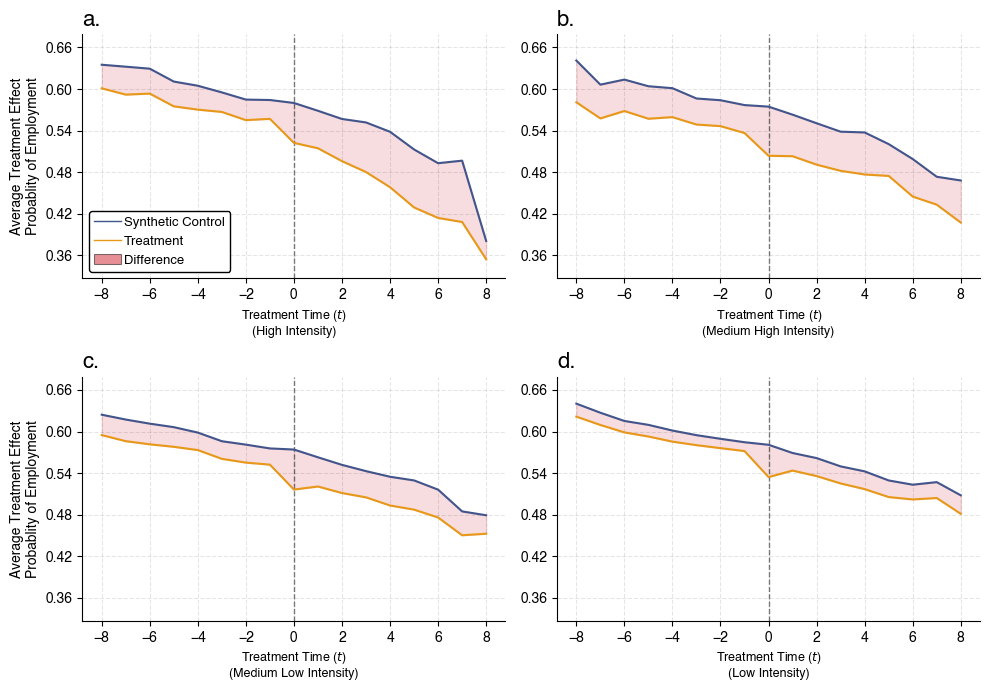

In [5]:
df_hi = load_data('synths_prob_emp_hi.csv',
                  'treats_prob_emp_hi.csv')
df_mhi = load_data('synths_prob_emp_mhi.csv',
                   'treats_prob_emp_mhi.csv')
df_mli = load_data('synths_prob_emp_mli.csv',
                   'treats_prob_emp_mli.csv')
df_li = load_data('synths_prob_emp_li.csv',
                  'treats_prob_emp_li.csv')   
figure_plotter(df_hi, df_mhi, df_mli, df_li,
               'Probablity of Employment',
               'prob_emp')